In [ ]:
# El PCA al final calcula la sombra de los vectores.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    ) # Aplicamos el escalamiento a las 4 variables numericas del dataset.

covariance_matrix = np.cov(scaled.T) # Creamos la matriz de covarianza del dataset con escalamiento.
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

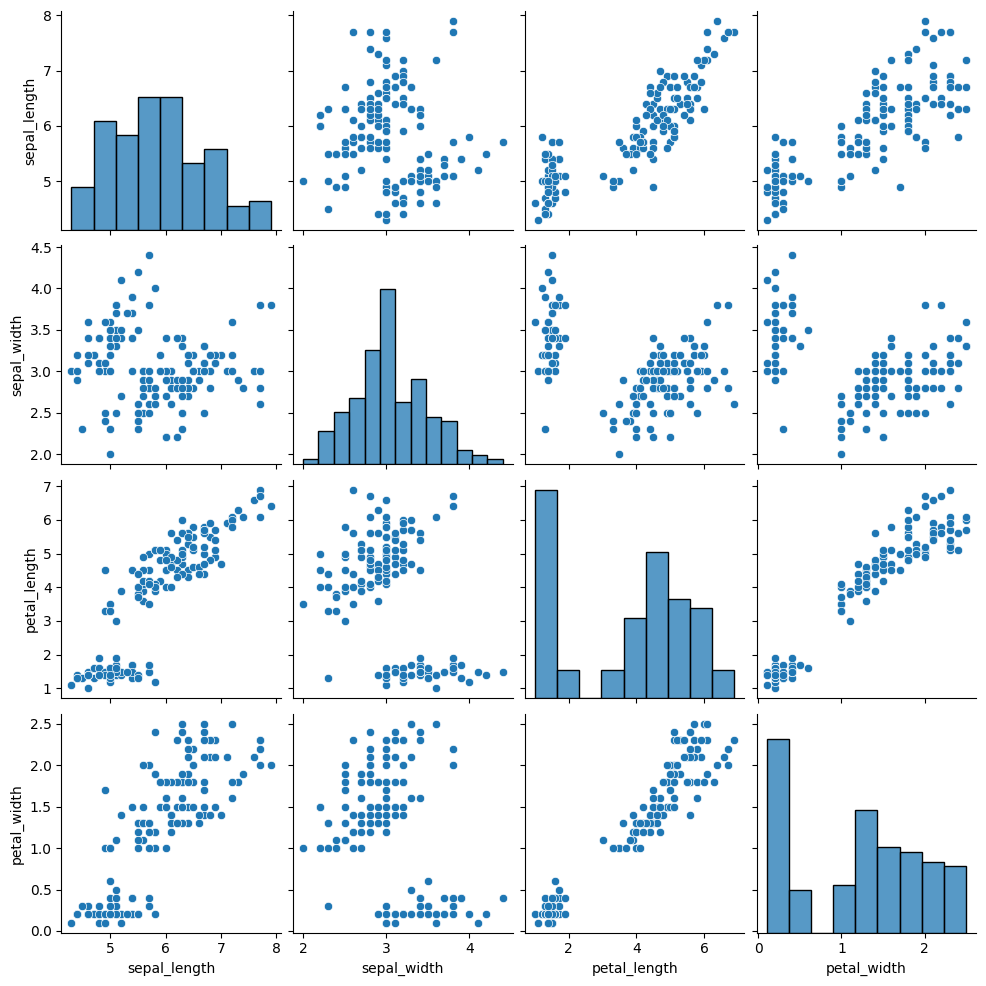

In [ ]:
sns.pairplot(iris) # Observamos las correlaciones. Vemos que el ancho y longitud del sepalo tiene una alta correlacion.

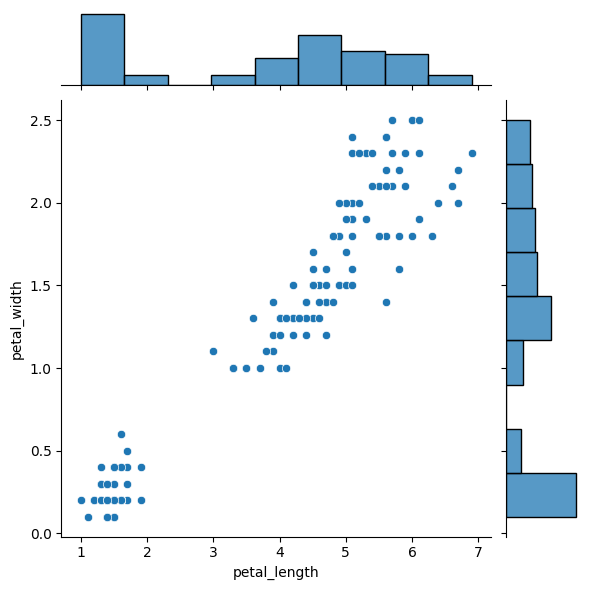

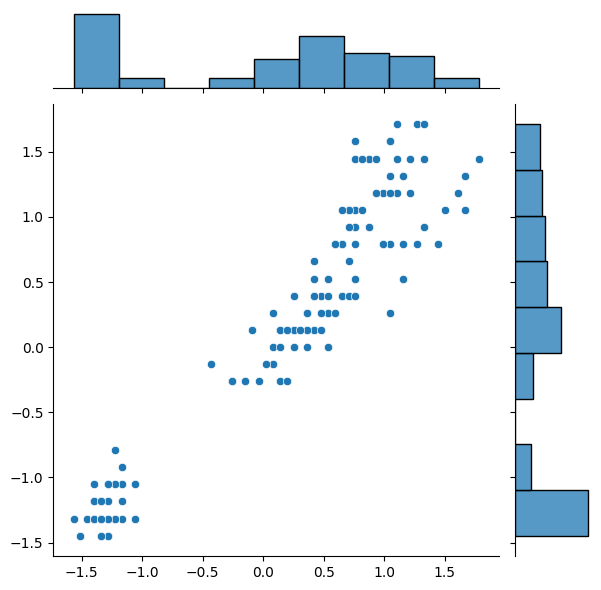

In [ ]:
sns.jointplot(x= iris['petal_length'], y=iris['petal_width']) # Con los datos originales.
sns.jointplot(x = scaled[:, 2], y = scaled[:,3]) # Con los datos estandarizados.

Descomposicion en vectores y valores propios: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [ ]:
# Calculamos los valores y vectores propios de la matriz de covarianza

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [ ]:
eigen_values

"""
Son 4 eigen-values porque tenemos 4 variables.
"""

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
eigen_vectors

"""
Son 4 vectores propios. Cada vector tiene un valor asociado con una variable.
"""

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

Los vectores y valores propios son los que capturan la mayor cantidad de varianza de los datos, y 
cada una de estas direcciones se denomina direccion principal.

In [ ]:
variance_explained = [] # Creamos una lista vacía

# Recorremos todos los valores propios para calcular la varianza que ellos explican
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

"""
Observamos que la primera componente recoge el 72.96% de la varianza total de las 4 dimensiones.
La segunda componente el 22.8%, la tercera el 3.66% y la cuarta el 0.51%.

Esto nos da un indicio de que las ultimas 2 componentes se pueden descartar, pues con las 2 primeras tenemos 
cerca del 95% de la varianza.
"""

[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]


PCA con scikit : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# Transformación para reducir la dimensionalidad

from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Usar el metodo PCA y tomar los datos para reducirlos a 2 componentes.
pca.fit(scaled) # Usar el metodo PCA sobre los datos con escalamiento.

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_ 
# Varianza explicada por cada uno de los valores propios seleccionados con PCA.
# La primera componente recoge el 72.96% de la varianza total de las 4 dimensiones. y la segunda el 22.8%.
# Aquí estoy creando dos nuevas variables que salen de las variables originales.

array([0.72962445, 0.22850762])

In [ ]:
reduced_scaled = pca.transform(scaled) 
# Aquí tomamos los datos originales y devuelve la transformación resultante de PCA.

In [ ]:
reduced_scaled
# Observamos que ahora hay 2 componentes en el dataset.

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [ ]:
iris['pca_1'] = scaled[:,0] # Creo una nueva columna en el df con los datos transformados PCA1
iris['pca_2'] = scaled[:,1] # Creo una nueva columna en el df con los datos transformados PCA2
iris
#sns.jointplot(iris['pca_1'], iris['pca_2'], hue = iris['species'])

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-0.900681,1.019004
1,4.9,3.0,1.4,0.2,setosa,-1.143017,-0.131979
2,4.7,3.2,1.3,0.2,setosa,-1.385353,0.328414
3,4.6,3.1,1.5,0.2,setosa,-1.506521,0.098217
4,5.0,3.6,1.4,0.2,setosa,-1.021849,1.249201
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.038005,-0.131979
146,6.3,2.5,5.0,1.9,virginica,0.553333,-1.282963
147,6.5,3.0,5.2,2.0,virginica,0.795669,-0.131979
148,6.2,3.4,5.4,2.3,virginica,0.432165,0.788808


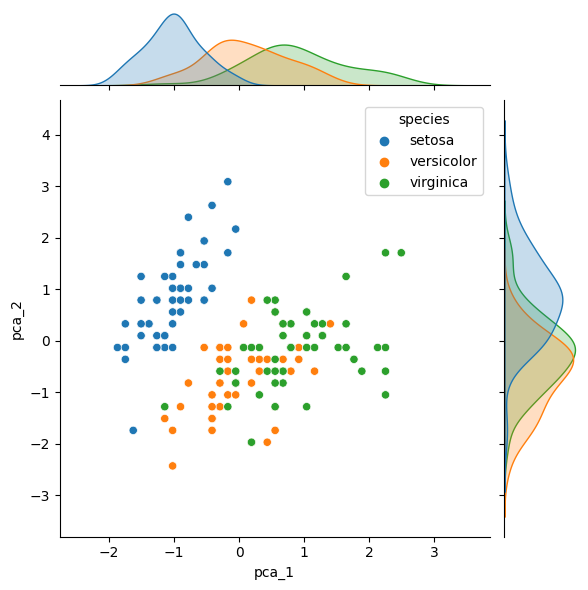

In [ ]:
sns.jointplot(data=iris, x='pca_1', y='pca_2', hue='species')
# Grafico de dispersion de las dimensiones reducidas, aquí vemos que hay el 95% de varianza total, y 
# solo se pierde cerca del 5% de la informacion.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=371ebfd8-f4ff-40d2-97ac-56ff977cb6d2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>